*Reference:* https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/8_sgd_vs_gd/gd_and_sgd.ipynb

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

*View dataset*

In [ ]:
df = pd.read_csv("csd_cg_data_normalised.csv")
df.head(5)

,predictions,truth,cosine similarity difference,correct.guess
0,1,0,0.027175,0
1,1,1,0.023638,1
2,1,1,0.023129,1
3,1,1,0.024362,1
4,1,0,0.021526,0


*Data Pre-processing*

In [ ]:
df = df.drop('correct.guess', axis=1)

In [ ]:
df = df.rename(columns={'cosine similarity difference':'csd'})

In [ ]:
df.head(5)

,predictions,truth,csd
0,1,0,0.027175
1,1,1,0.023638
2,1,1,0.023129
3,1,1,0.024362
4,1,0,0.021526


*Mini-Batch Gradient Descent*

In [ ]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('predictions',axis='columns'))
scaled_X

array([[0.        , 0.38884289],
       [1.        , 0.38623363],
       [1.        , 0.38585792],
       ...,
       [1.        , 0.31578974],
       [1.        , 0.13887928],
       [1.        , 0.1678254 ]])

In [ ]:
sy = preprocessing.MinMaxScaler()

scaled_y = sy.fit_transform(df['predictions'].values.reshape(df.shape[0],1))
scaled_y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
X

0         1
1         0
2         0
3         1
4         0
         ..
559994    1
559995    1
559996    0
559997    0
559998    1
Name: ground truth, Length: 559999, dtype: int64

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = scaled_X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (truth, csd)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, scaled_X.T) + b

        w_grad = -(2/total_samples)*(scaled_X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.32720909, 0.78635696]), -0.323896768947733, 0.1724322001605334)

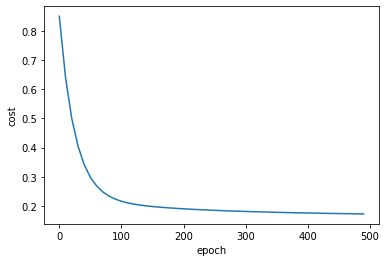

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)